# Домашнє завдання №9. Підбір гіперпараметрів

## Cтворення нейронної мережі за допомогою механізмів Keras, яка буде класифікувати товари із датасету fashion_mnist з точністю не менше 91%

### 1. Завантаження і підготовка даних

In [66]:
from tensorflow import keras


In [67]:
from keras.datasets import fashion_mnist
# датасет із зображеннями одягу та взуття, містить 60 000 тренувальних зображень і 10 000 тестових зображень розміром 28x28 пікселів, представляючи одяг у 10 різних класах

from keras.models import Sequential  # клас, який дозволяє створювати моделі шар за шаром

from keras.layers import Dense  # клас, який створює повнозв'язкові шари

from keras import utils  # утиліти для переведення даних в підходячий для keras формат

In [68]:
# Розпакування даних з load_data на тренувальні та тестові дані, а також відповідні мітки (labels)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [69]:
# Проаналізуємо форму тренувальних даних
print(x_train[0].shape)

(28, 28)


In [70]:
# Оскільки повнозв'язкова нейромережа не може працювати з двовимірним масивом,
# його необхідно переформатувати в одновимірний вектор

import numpy as np
# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])

# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

In [71]:
x_train.shape

(60000, 784)

В датасеті fashion_mnist правильні відповіді містять номер класу зображення. Нейромережа видаватиме 10 значень (по кількості вихідних нейронів) з вирогідностями приналежності одягу до певного класу. Тому нам необхідно перетворити представлення правильних відповідей з номерів класів (від 0 до 9) у one-hot-encoding формат.

In [72]:
# Перетворимо мітки в категорії (one-hot-encoding)
y_train = utils.to_categorical(y_train, num_classes=10)

In [73]:
y_train.shape

(60000, 10)

### 2. Підбір гіперпараметрів для різних архітектур нейромережі

#### Модель №1. Базова архітектура

В якості першого варіанту побудуємо повнозв'язкову (всі нейрони одного шару пов'язані зі всіма нейронами наступного шуру) нейромережу з двох шарів:
- вхідний шар з 50 нейронів;
- вихідний шар з 10 нейронів.

Кількість нейронів на вхідному шарі можна міняти, але кількість нейронів виходного шару має дорівнювати кількості міток.

Кожний вихідний нейрон видаватиме вирогідність (від 0 до 1) конкретного предмету одягу.

In [74]:
# створюємо послідовну модель
model1 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model1.add(Dense(50, input_dim=784, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model1.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model1.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [75]:
# виведемо параметри моделі
print(model1.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 50)                39250     
                                                                 
 dense_23 (Dense)            (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [76]:
# Відокремимо з тренувального датасету частини для відстежування ефективності в процесі навчання
# Для цієї мети тестовий набір не чипаємо, він повинен слугувати для оцінки фактичної ефективності моделі на реальних, раніше не бачених даних
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model1.fit(
    partial_x_train,
    partial_y_train,
    batch_size=200,
    epochs=100,
    validation_data=(x_val, y_val)
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/100
250/250 [==============================] - 2s 5ms/step - loss: 1.4017 - accuracy: 0.5777 - val_loss: 0.9781 - val_accuracy: 0.6810
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.8688 - accuracy: 0.7096 - val_loss: 0.7938 - val_accuracy: 0.7344
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.7456 - accuracy: 0.7528 - val_loss: 0.7114 - val_accuracy: 0.7665
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.6787 - accuracy: 0.7755 - val_loss: 0.6574 - val_accuracy: 0.7853
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.6351 - accuracy: 0.7904 - val_loss: 0.6221 - val_accuracy: 0.7986
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.6037 - accuracy: 0.7990 - val_loss: 0.5954 - val_accuracy: 0.8071
Epoch 7/100
250/250 [==============================] - 2s 7ms/step - loss: 0.5801 - accuracy: 0.8066 - val_loss: 0.5750 - val_accuracy: 0.8121

In [77]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


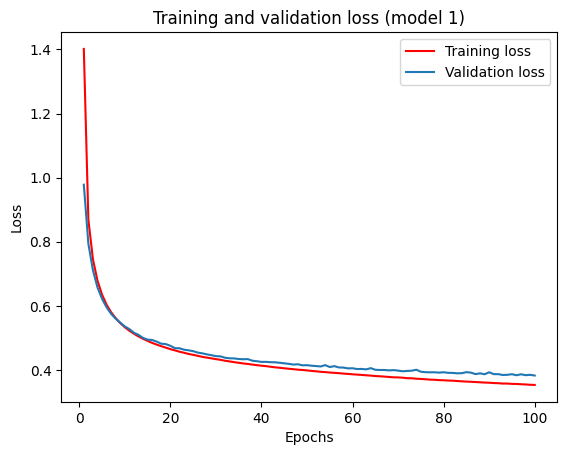

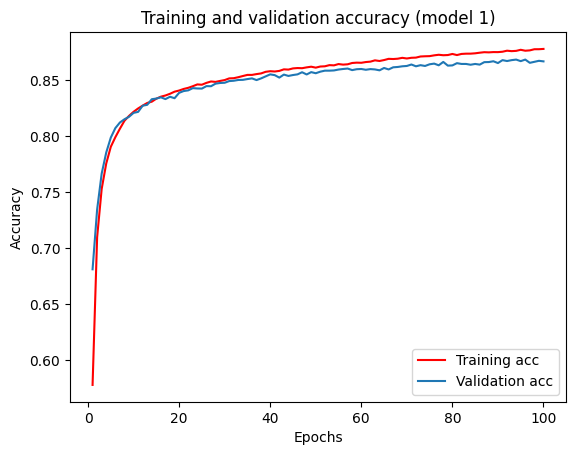

In [78]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 1)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Бачимо, що для моделі №1 в процесі навчання на тренувальному наборі ф-я втрат спадає, а точність зростає. Але точність недостатня (менше 0.91). Модель можна покращити.

#### Модель №2. Додатковий шар нейронів

В другому варіанті додамо до нейромережі ще один шар з 50 нейронів.


In [79]:
# створюємо послідовну модель
model2 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model2.add(Dense(50, input_dim=784, activation='relu'))
model2.add(Dense(50, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model2.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model2.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [80]:
# виведемо параметри моделі
print(model2.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 50)                39250     
                                                                 
 dense_25 (Dense)            (None, 50)                2550      
                                                                 
 dense_26 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [81]:
# Відокремимо з тренувального датасету частини для відстежування ефективності в процесі навчання
# Для цієї мети тестовий набір не чипаємо, він повинен слугувати для оцінки фактичної ефективності моделі на реальних, раніше не бачених даних
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model2.fit(
    partial_x_train,
    partial_y_train,
    batch_size=200,
    epochs=100,
    validation_data=(x_val, y_val)
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/100
250/250 [==============================] - 2s 7ms/step - loss: 1.7097 - accuracy: 0.4618 - val_loss: 1.1326 - val_accuracy: 0.6433
Epoch 2/100
250/250 [==============================] - 2s 7ms/step - loss: 0.9365 - accuracy: 0.6804 - val_loss: 0.8163 - val_accuracy: 0.7129
Epoch 3/100
250/250 [==============================] - 2s 6ms/step - loss: 0.7599 - accuracy: 0.7347 - val_loss: 0.7109 - val_accuracy: 0.7515
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.6793 - accuracy: 0.7622 - val_loss: 0.6516 - val_accuracy: 0.7731
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.6272 - accuracy: 0.7824 - val_loss: 0.6103 - val_accuracy: 0.7914
Epoch 6/100
250/250 [==============================] - 1s 5ms/step - loss: 0.5902 - accuracy: 0.7970 - val_loss: 0.5767 - val_accuracy: 0.8009
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.5622 - accuracy: 0.8077 - val_loss: 0.5573 - val_accuracy: 0.8066

In [82]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


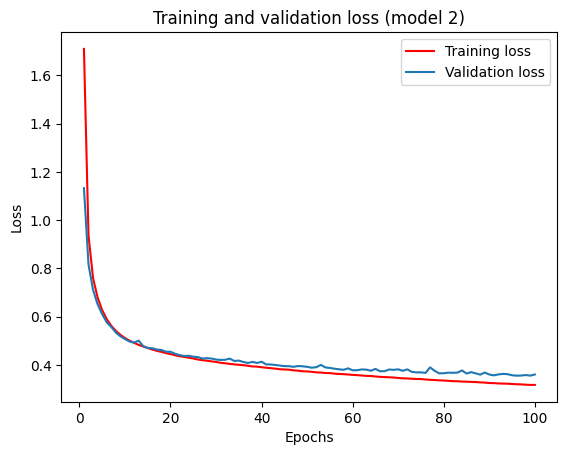

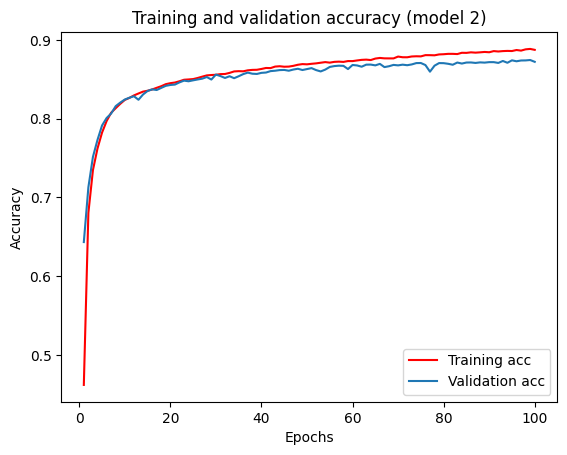

In [83]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №2 складніша за модель №1 (додано шар), точність дещо вища, але токож маємо недонавчання. В моделі №3 будемо відштовхуватися від моделі №2.

#### Модель №3. Збільшення кількості нейронів

В третьому варіанті беремо за основу модель №2. Спробуємо збільшити кількість нейронів на внутрішньому шарі до 100.


In [84]:
# створюємо послідовну модель
model3 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model3.add(Dense(50, input_dim=784, activation='relu'))
model3.add(Dense(100, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model3.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model3.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [85]:
# виведемо параметри моделі
print(model3.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 50)                39250     
                                                                 
 dense_28 (Dense)            (None, 100)               5100      
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 45360 (177.19 KB)
Trainable params: 45360 (177.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [86]:
# Відокремимо з тренувального датасету частини для відстежування ефективності в процесі навчання
# Для цієї мети тестовий набір не чипаємо, він повинен слугувати для оцінки фактичної ефективності моделі на реальних, раніше не бачених даних
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model3.fit(
    partial_x_train,
    partial_y_train,
    batch_size=200,
    epochs=100,
    validation_data=(x_val, y_val)
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/100
250/250 [==============================] - 2s 8ms/step - loss: 1.4820 - accuracy: 0.5669 - val_loss: 0.9995 - val_accuracy: 0.6755
Epoch 2/100
250/250 [==============================] - 2s 8ms/step - loss: 0.8717 - accuracy: 0.7088 - val_loss: 0.7872 - val_accuracy: 0.7341
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.7317 - accuracy: 0.7561 - val_loss: 0.6926 - val_accuracy: 0.7713
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.6565 - accuracy: 0.7834 - val_loss: 0.6341 - val_accuracy: 0.7924
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.6073 - accuracy: 0.7985 - val_loss: 0.5997 - val_accuracy: 0.7961
Epoch 6/100
250/250 [==============================] - 1s 5ms/step - loss: 0.5729 - accuracy: 0.8074 - val_loss: 0.5682 - val_accuracy: 0.8087
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.5481 - accuracy: 0.8149 - val_loss: 0.5417 - val_accuracy: 0.8179

In [87]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


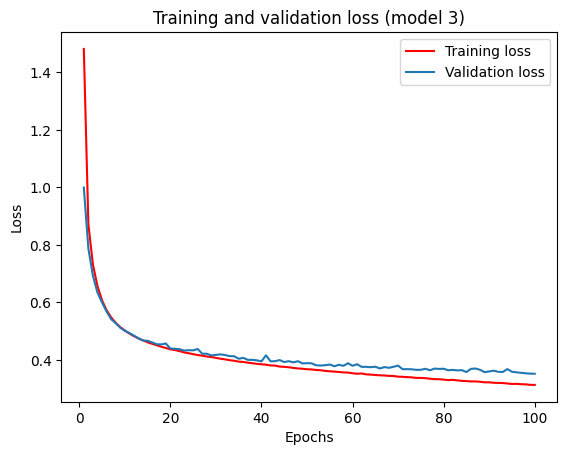

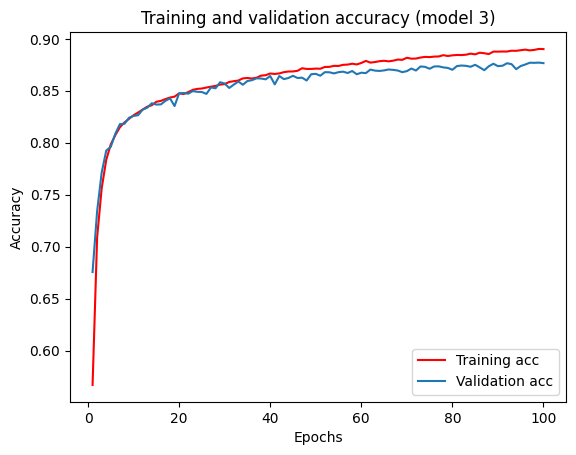

In [88]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 3)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №3 складніша за модель №2 (більше нейронів), при цьому точність не стала вище. Тому в моделі №4 будемо відштовхуватися від моделі №2.

#### Модель №4. Зміна функцій активації

В четвертому варіанті беремо за основу модель №2. Спробуємо замінити функції активації 'relu' на 'leaky_relu'.


In [94]:
# створюємо послідовну модель
model4 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model4.add(Dense(50, input_dim=784, activation='leaky_relu'))
model4.add(Dense(50, activation='leaky_relu'))
# input_dim=784 - кількість входів в кожний нейрон
model4.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model4.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [95]:
# виведемо параметри моделі
print(model4.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 50)                39250     
                                                                 
 dense_34 (Dense)            (None, 50)                2550      
                                                                 
 dense_35 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [96]:
# Відокремимо з тренувального датасету частини для відстежування ефективності в процесі навчання
# Для цієї мети тестовий набір не чипаємо, він повинен слугувати для оцінки фактичної ефективності моделі на реальних, раніше не бачених даних
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model4.fit(
    partial_x_train,
    partial_y_train,
    batch_size=200,
    epochs=100,
    validation_data=(x_val, y_val)
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/100
250/250 [==============================] - 23s 87ms/step - loss: 1.3892 - accuracy: 0.6019 - val_loss: 0.9361 - val_accuracy: 0.6921
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.8219 - accuracy: 0.7217 - val_loss: 0.7430 - val_accuracy: 0.7443
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.6946 - accuracy: 0.7666 - val_loss: 0.6610 - val_accuracy: 0.7794
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.6288 - accuracy: 0.7901 - val_loss: 0.6089 - val_accuracy: 0.7948
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5865 - accuracy: 0.8031 - val_loss: 0.5799 - val_accuracy: 0.8028
Epoch 6/100
250/250 [==============================] - 2s 7ms/step - loss: 0.5578 - accuracy: 0.8124 - val_loss: 0.5494 - val_accuracy: 0.8143
Epoch 7/100
250/250 [==============================] - 2s 7ms/step - loss: 0.5367 - accuracy: 0.8169 - val_loss: 0.5339 - val_accuracy: 0.81

In [97]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


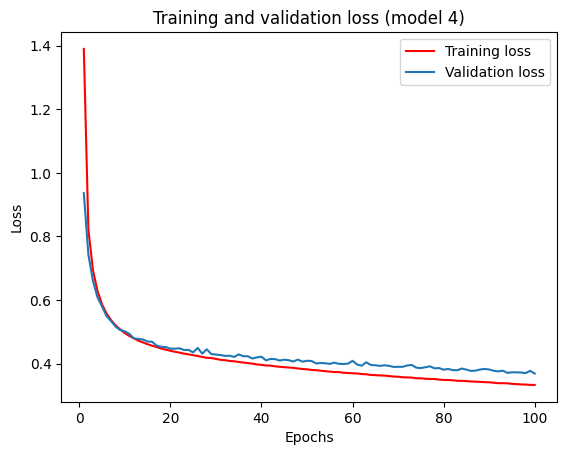

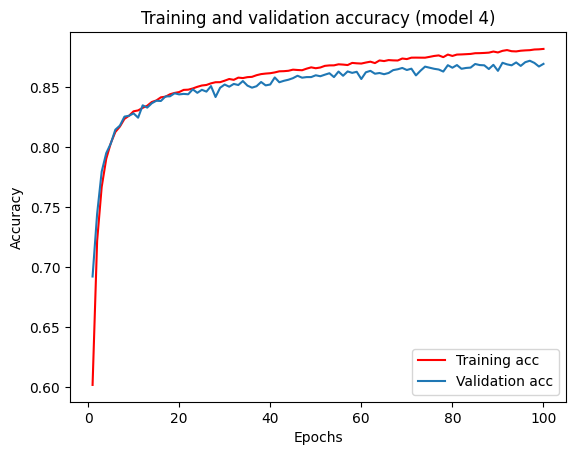

In [98]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 4)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 4)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №4 не досягає мінімальної точності.

#### Модель №5. Збільшуємо кількість епох

Використовуємо за основу модель №2. Збільшемо кількість епох до 200

In [102]:
# створюємо послідовну модель
model5 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model5.add(Dense(50, input_dim=784, activation='relu'))
model5.add(Dense(50, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model5.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model5.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [103]:
# виведемо параметри моделі
print(model5.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 50)                39250     
                                                                 
 dense_40 (Dense)            (None, 50)                2550      
                                                                 
 dense_41 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [104]:
# Відокремимо з тренувального датасету частини для відстежування ефективності в процесі навчання
# Для цієї мети тестовий набір не чипаємо, він повинен слугувати для оцінки фактичної ефективності моделі на реальних, раніше не бачених даних
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model5.fit(
    partial_x_train,
    partial_y_train,
    batch_size=200,
    epochs=200,
    validation_data=(x_val, y_val)
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/200
250/250 [==============================] - 2s 6ms/step - loss: 1.5120 - accuracy: 0.5341 - val_loss: 1.0180 - val_accuracy: 0.6479
Epoch 2/200
250/250 [==============================] - 1s 5ms/step - loss: 0.8922 - accuracy: 0.6689 - val_loss: 0.8088 - val_accuracy: 0.6950
Epoch 3/200
250/250 [==============================] - 1s 5ms/step - loss: 0.7633 - accuracy: 0.7112 - val_loss: 0.7324 - val_accuracy: 0.7316
Epoch 4/200
250/250 [==============================] - 1s 5ms/step - loss: 0.6946 - accuracy: 0.7492 - val_loss: 0.6722 - val_accuracy: 0.7619
Epoch 5/200
250/250 [==============================] - 1s 4ms/step - loss: 0.6446 - accuracy: 0.7744 - val_loss: 0.6285 - val_accuracy: 0.7863
Epoch 6/200
250/250 [==============================] - 1s 5ms/step - loss: 0.6055 - accuracy: 0.7922 - val_loss: 0.5932 - val_accuracy: 0.7987
Epoch 7/200
250/250 [==============================] - 1s 6ms/step - loss: 0.5752 - accuracy: 0.8031 - val_loss: 0.5683 - val_accuracy: 0.8064

In [105]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


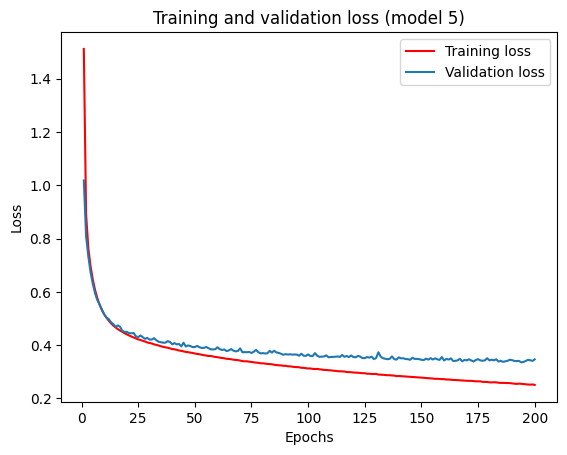

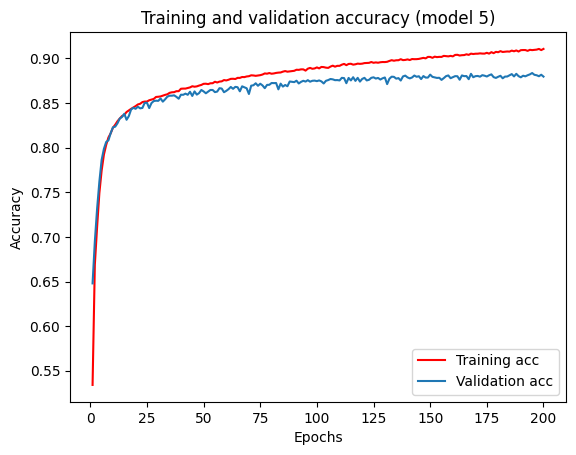

In [106]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 5)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 5)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №5 попри збільшення в два рази кількості епох, все ще недонавчена.

#### Модель №6. Зменшуємо розмір батчу

Використовуємо за основу модель №2. Зменшимо розмір батчу до 100

In [113]:
# створюємо послідовну модель
model6 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model6.add(Dense(50, input_dim=784, activation='relu'))
model6.add(Dense(50, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model6.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model6.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [114]:
# виведемо параметри моделі
print(model6.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 50)                39250     
                                                                 
 dense_46 (Dense)            (None, 50)                2550      
                                                                 
 dense_47 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [115]:
# Відокремимо з тренувального датасету частини для відстежування ефективності в процесі навчання
# Для цієї мети тестовий набір не чипаємо, він повинен слугувати для оцінки фактичної ефективності моделі на реальних, раніше не бачених даних
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model6.fit(
    partial_x_train,
    partial_y_train,
    batch_size=100,
    epochs=100,
    validation_data=(x_val, y_val)
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/100
500/500 [==============================] - 3s 5ms/step - loss: 1.2604 - accuracy: 0.6055 - val_loss: 0.7891 - val_accuracy: 0.7263
Epoch 2/100
500/500 [==============================] - 3s 6ms/step - loss: 0.7039 - accuracy: 0.7515 - val_loss: 0.6433 - val_accuracy: 0.7768
Epoch 3/100
500/500 [==============================] - 2s 4ms/step - loss: 0.6070 - accuracy: 0.7872 - val_loss: 0.5778 - val_accuracy: 0.8016
Epoch 4/100
500/500 [==============================] - 2s 3ms/step - loss: 0.5575 - accuracy: 0.8065 - val_loss: 0.5385 - val_accuracy: 0.8135
Epoch 5/100
500/500 [==============================] - 2s 4ms/step - loss: 0.5254 - accuracy: 0.8192 - val_loss: 0.5165 - val_accuracy: 0.8192
Epoch 6/100
500/500 [==============================] - 2s 4ms/step - loss: 0.5025 - accuracy: 0.8262 - val_loss: 0.4980 - val_accuracy: 0.8276
Epoch 7/100
500/500 [==============================] - 2s 4ms/step - loss: 0.4848 - accuracy: 0.8325 - val_loss: 0.4822 - val_accuracy: 0.8342

In [116]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


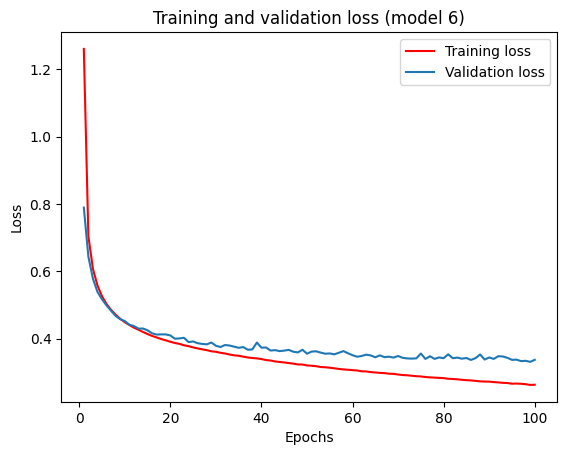

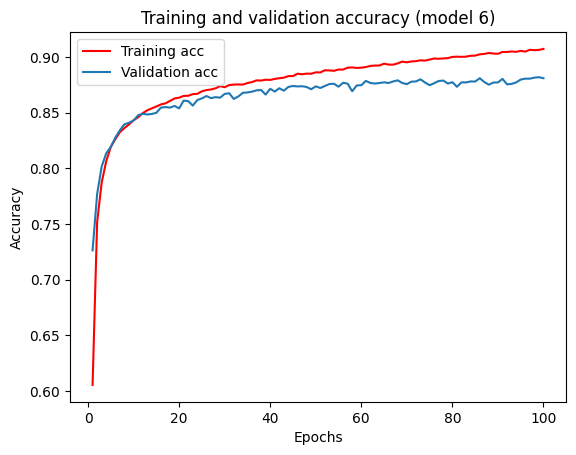

In [117]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 6)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 6)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №6 все ще недонавчена, але точність дещо збільшилася.